In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as sp
import scipy.stats as st

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# Marketing Campaign

## EDA (Exploratory Data Analysis)

In [5]:
path = '/content/drive/MyDrive/Copy of marketing_campaign.xlsx'

df = pd.read_excel(path)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Descriptive Statistics

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
nums= ['Year_Birth','Kidhome','Teenhome','Income','Recency','MntWines','MntFruits','MntMeatProducts',
       'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
       'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumStorePurchases',
       'NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1',
       'Complain','Z_CostContact','Z_Revenue','Response',]
cats= ['Education','Marital_Status']

In [9]:
df[nums].describe()

,Year_Birth,Kidhome,Teenhome,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,0.444196,0.506250,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.009375,3.0,11.0,0.149107
std,11.984069,0.538398,0.544538,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.096391,0.0,0.0,0.356274
min,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,0.000000,0.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,0.000000,0.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,1.000000,1.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,2.000000,2.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df[cats].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [11]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?

Semua kolom sudah memiliki tipe data yang sesuai.


B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

Ada, yaitu, kolom Income (2216 of 2240).


C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

- Kolom Year Birth ada kemungkinan outlier/nilai minimum agak aneh (1893).
- Nilai maksimum kolom Income terlalu jauh (kemungkinan outlier). Perbandingan nilai mean & median pun berbeda jauh.
- Besaran nilai mean & median pada kolom jumlah pembelian per produk (Mnt...) jauh berbeda. Terdapat kemungkinan skew.
- Terdapat kemungkinan outlier pada nilai maksimum di kolom jumlah pembelian per media belanja (Num...).

### Univariate Analysis

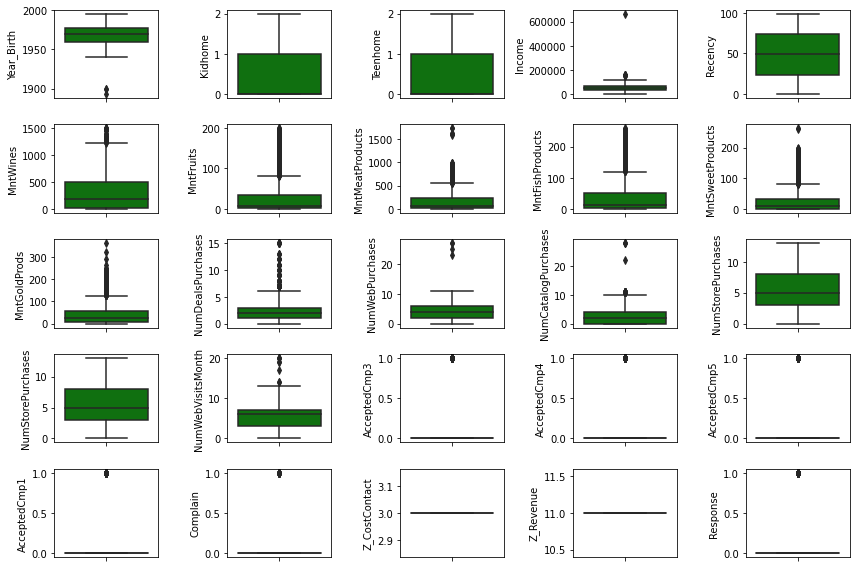

In [12]:
features = nums
plt.figure(figsize=(12, 8))
for i in range(0, len(features)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

- Banyak data outlier di kolom pembelian produk `Mnt` dan juga kolom `Num`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


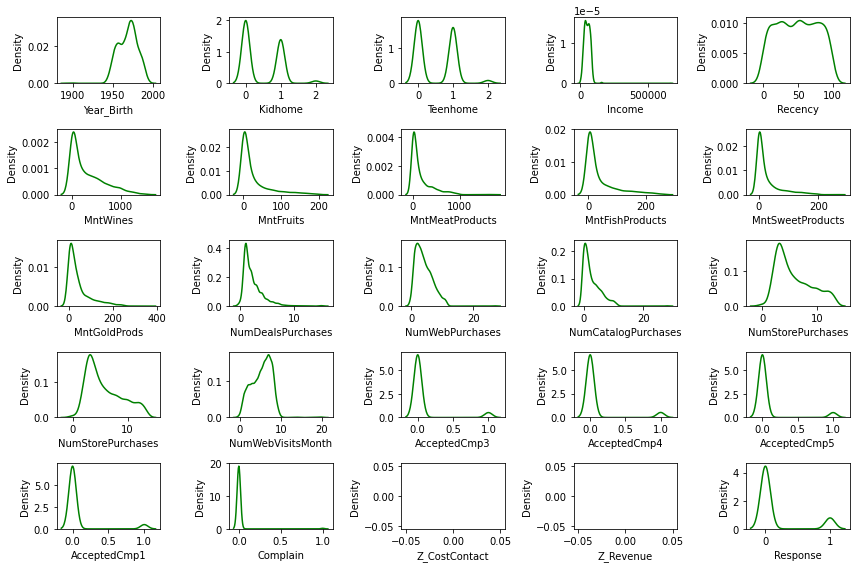

In [13]:
features = nums
plt.figure(figsize=(12, 8))
for i in range(0, len(features)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

- Untuk kolom pembelian produk cenderung skewed, harus dilakukuan tindakan agar penyebarannya normal

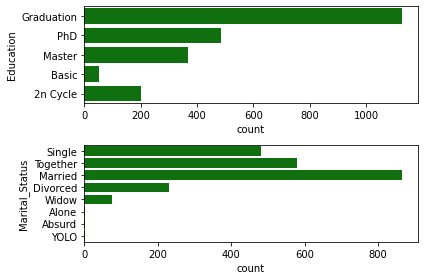

In [14]:
for i in range(0, len(cats)):
    plt.subplot(2, 1, i+1)
    sns.countplot(y = df[cats[i]], color='green', orient='v')
    plt.tight_layout()

- Untuk pembeli terbanyak datang dari customer yang memiliki tingkat pendidikan `Graduation` dan status `Married`

### Multivariate Analysis

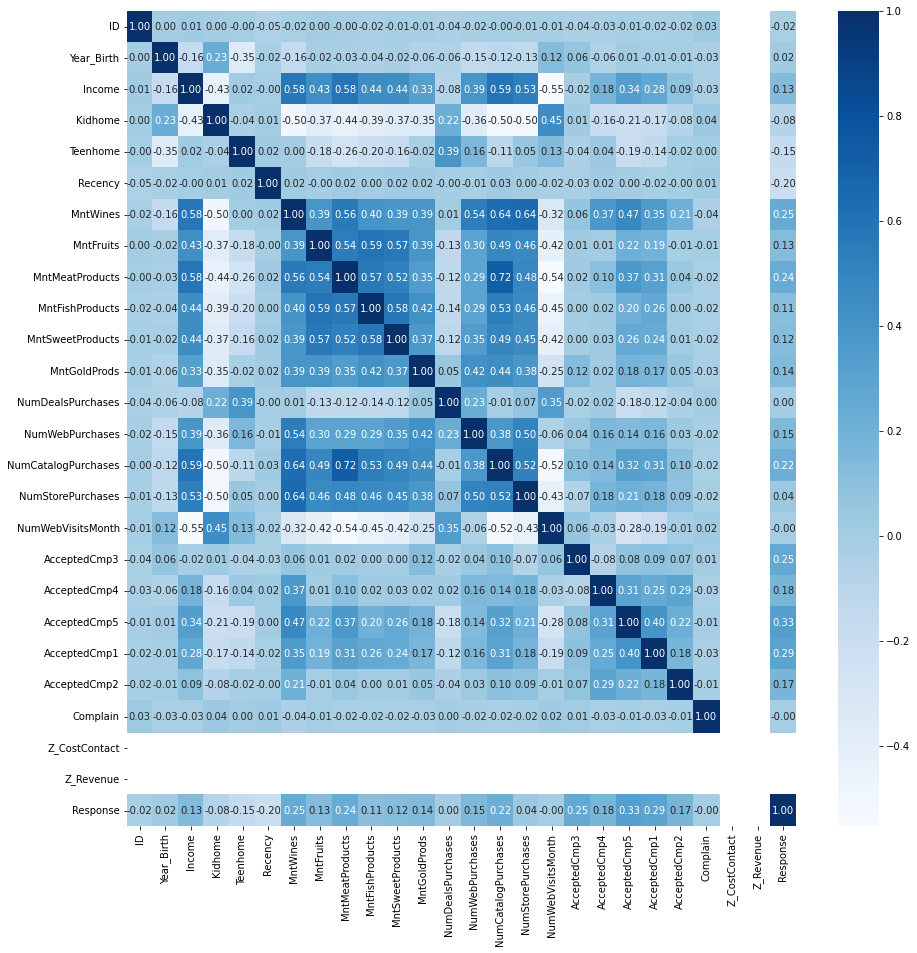

In [16]:
# correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target `Response` memiliki korelasi paling kuat dengan `acceptedcmp5` (strong potential feature),`acceptedcmp1-4`,`Recency`,`Income`,`Teenhome`,`Kidhome`,`NumWeb & Numcatalog` dan semua produk `Mnt...` (decent potential feature).
* Di antara semua campaign, Campaign 5 memiliki korelasi terkuat terhadap Respon.
* Di antara produk yang terjual, produk Wines dan Daging memiliki korelasi yang lebih kuat dibanding produk lainnya terhadap Respon. 
* Sedangkan korelasi `Response` dengan `umur` dan `numstore` sangat lemah ~0, ini menandakan bisa jadi mereka bukan fitur yang potensial
* `MntMeat` (Pembelian Daging) memiliki korelasi positif cukup kuat (r=0.72) dengan `NumCatalog` (Pembelian lewat Catalog). Korelasi cukup tinggi sehingga rawan menjadi Redundant. (Perlu diperhatikan saat training model).

In [17]:
df_sample = df.sample(1000, random_state=42)

In [18]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

Dapat terlihat bahwa:
* Target Response memiliki korelasi dengan Campaign (1 sampai 5), Recency, KidsHome, TeenHome, income, NumWeb & NumCatalog dan semua produk (Mnt..).
* Namun, berbeda dengan hasil `Correlation Heatmap` yang menunjukkan relasi kuat antara jumlah pembelian `Daging` dan `NumCatalog`, pada `Pair Plot` di atas, tidak terlihat hubungan yang linear antara keduanya. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


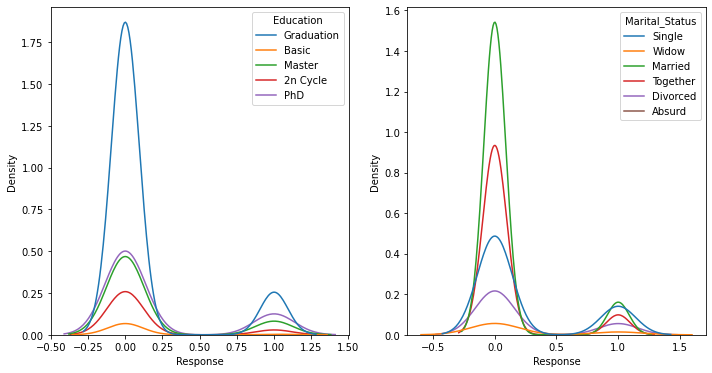

In [19]:
features = cats
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df_sample, x='Response', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout();

* Sepertinya, semua jenis Pendidikan memiliki efek yang kurang lebih sama terhadap Respon.
* Begitu juga dengan Status Pernikahan.

### EDA Conclusion

1. Data telihat valid, tidak ada kecacatan yang signifikan
2. Data kosong berada di kolom `Income` sehingga nanti akan ditangani ketika proses preprocessing
3. Beberapa data memiliki bentuk distribusi positive skewed, sehingga nanti perlu diberikan perlakuan agar data menjadi normal
4. Jika dilihat dari media pembelian ('NumCatalogPurchases','NumStorePurchases','NumWebPurchases'). `NumCatalogPurchases` memiliki hubungan yang relatif lebih kuat apabila dihubungkan dengan 'AcceptedCmp' dan 'Responses'.
5. Dari feature categorical : `MaritalStatus` dan `Education` berpotensi menjadi predictor model.
6. Di antara semua campaign, `Campaign 5` memiliki korelasi terkuat terhadap Respon.
7. Di antara produk yang terjual, produk `Wines` dan `Daging` memiliki korelasi yang lebih kuat dibanding produk lainnya terhadap Respon. 
8. Kemungkinan menambahkan kolom baru untuk membantu proses modelling

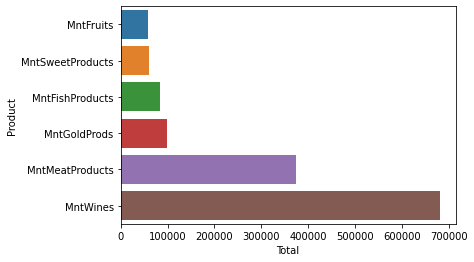

In [20]:
prods = [col for col in df if col.startswith('Mnt')]
df_P = df[prods].sum()
df_P1  = pd.DataFrame(df_P).reset_index()
df_P1.columns = ['Product','Total']
df_P1 = df_P1.sort_values('Total')

sns.barplot(y=df_P1['Product'], x=df_P1['Total'])

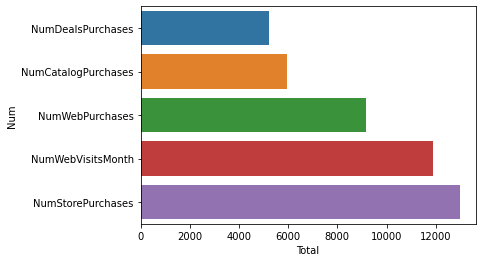

In [21]:
total_purchase = [col for col in df if col.startswith('Num')]
df_TP = df[total_purchase].sum()
df_TP1  = pd.DataFrame(df_TP).reset_index()
df_TP1.columns = ['Num','Total']
df_TP1 = df_TP1.sort_values('Total')

sns.barplot(y=df_TP1['Num'], x=df_TP1['Total'])

In [22]:
dfs1 = df.groupby(['Marital_Status', 'Response'])['ID'].count().reset_index(name='UniqueCustomer')
dfs2 = df.groupby(['Marital_Status'])['ID'].count().reset_index(name='AllUniqueCustomer')
dfs = dfs1.merge(dfs2, how = 'inner', on='Marital_Status')
dfs['PercentUniqueCustomer'] = round(dfs['UniqueCustomer']*100.0/dfs['AllUniqueCustomer'], 2) 
dfs= dfs.sort_values('AllUniqueCustomer', ascending= False)

Text(0.5, 1.0, 'Marital Status to Response percentage')

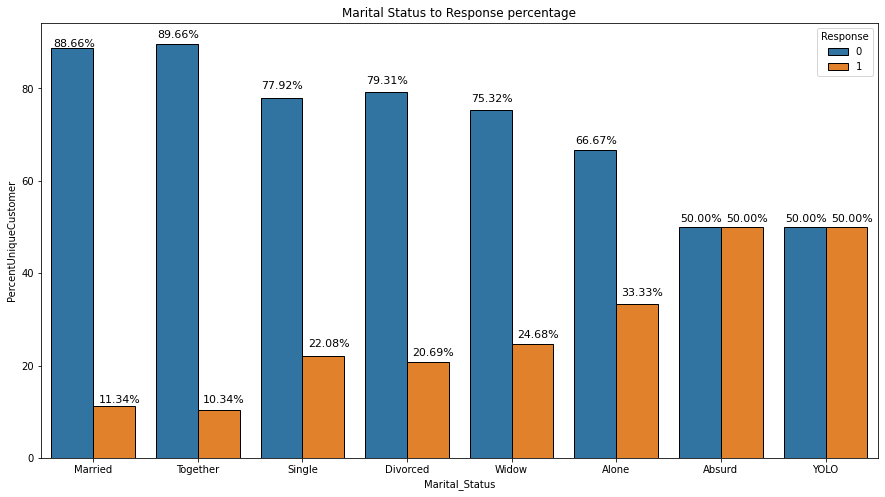

In [23]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x = 'Marital_Status', y = 'PercentUniqueCustomer', data = dfs,
            hue = 'Response',edgecolor = 'black')

plt.text(x = -0.18, y = 89, s = "88.66%", ha='center', fontsize=11)
plt.text(x = 0.25, y = 12, s = "11.34%", ha='center', fontsize=11)

plt.text(x = 0.81, y = 91, s = "89.66%", ha='center', fontsize=11)
plt.text(x = 1.25, y = 12, s = "10.34%", ha='center', fontsize=11)

plt.text(x = 1.81, y = 80, s = "77.92%", ha='center', fontsize=11)
plt.text(x = 2.25, y = 24, s = "22.08%", ha='center', fontsize=11)

plt.text(x = 2.81, y = 81, s = "79.31%", ha='center', fontsize=11)
plt.text(x = 3.25, y = 22, s = "20.69%", ha='center', fontsize=11)

plt.text(x = 3.81, y = 77, s = "75.32%", ha='center', fontsize=11)
plt.text(x = 4.25, y = 26, s = "24.68%", ha='center', fontsize=11)

plt.text(x = 4.81, y = 68, s = "66.67%", ha='center', fontsize=11)
plt.text(x = 5.25, y = 35, s = "33.33%", ha='center', fontsize=11)

plt.text(x = 5.81, y = 51, s = "50.00%", ha='center', fontsize=11)
plt.text(x = 6.25, y = 51, s = "50.00%", ha='center', fontsize=11)

plt.text(x = 6.81, y = 51, s = "50.00%", ha='center', fontsize=11)
plt.text(x = 7.25, y = 51, s = "50.00%", ha='center', fontsize=11)

plt.title('Marital Status to Response percentage')

In [24]:
des1 = df.groupby(['Education', 'Response'])['ID'].count().reset_index(name='UniqueCustomer')
des2 = df.groupby(['Education'])['ID'].count().reset_index(name='AllUniqueCustomer')
des = des1.merge(des2, how = 'inner', on='Education')
des['PercentUniqueCustomer'] = round(des['UniqueCustomer']*100.0/des['AllUniqueCustomer'], 2) 
des= des.sort_values('PercentUniqueCustomer', ascending= False)

In [25]:
des

,Education,Response,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
2,Basic,0,52,54,96.30
0,2n Cycle,0,181,203,89.16
4,Graduation,0,975,1127,86.51
6,Master,0,313,370,84.59
8,PhD,0,385,486,79.22
9,PhD,1,101,486,20.78
7,Master,1,57,370,15.41
5,Graduation,1,152,1127,13.49
1,2n Cycle,1,22,203,10.84
3,Basic,1,2,54,3.70


Text(0.5, 1.0, 'Education to Response percentage')

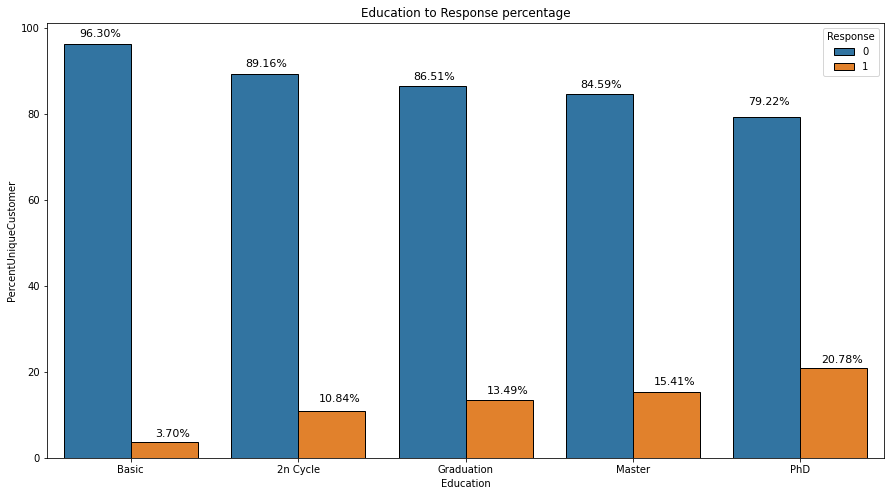

In [26]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x = 'Education', y = 'PercentUniqueCustomer', data = des, 
            hue = 'Response',edgecolor = 'black')

plt.text(x = -0.18, y =98 , s = "96.30%", ha='center', fontsize=11)
plt.text(x = 0.25, y =5 , s = "3.70%", ha='center', fontsize=11)

plt.text(x = 0.81, y = 91, s = "89.16%", ha='center', fontsize=11)
plt.text(x = 1.25, y = 13, s = "10.84%", ha='center', fontsize=11)

plt.text(x = 1.81, y = 88, s = "86.51%", ha='center', fontsize=11)
plt.text(x = 2.25, y = 15, s = "13.49%", ha='center', fontsize=11)

plt.text(x = 2.81, y = 86, s = "84.59%", ha='center', fontsize=11)
plt.text(x = 3.25, y = 17, s = "15.41%", ha='center', fontsize=11)

plt.text(x = 3.81, y =82 , s = "79.22%", ha='center', fontsize=11)
plt.text(x = 4.25, y =22 , s = "20.78%", ha='center', fontsize=11)

plt.title('Education to Response percentage')

In [27]:
Q1 = df.Income.quantile(.25)
Q3 = df.Income.quantile(.75)

In [28]:
def segment(x):
    try:
        x.Income.isnumeric()
    except:
        segment = 'No Sales'
    if x.Income >= Q3:
        segment = 'High'
    elif x.Income < Q3 and x.Income >= Q1:
        segment = 'Medium'
    else:
        segment = 'Low'
    return segment

In [29]:
df['Segmentasi'] = df.apply(lambda x: segment(x), axis = 1)
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Segmentasi
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,Medium
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,Medium
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,Medium
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,High
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,0,0,0,0,0,0,3,11,1,Medium


In [30]:
seg1 = df.groupby(['Segmentasi', 'Response'])['ID'].count().reset_index(name='UniqueCustomer')
seg2 = df.groupby(['Segmentasi'])['ID'].count().reset_index(name='AllUniqueCustomer')
seg = seg1.merge(seg2, how = 'inner', on='Segmentasi')
seg['PercentUniqueCustomer'] = round(seg['UniqueCustomer']*100.0/seg['AllUniqueCustomer'], 2)
seg= seg.sort_values('PercentUniqueCustomer', ascending= False)

In [31]:
seg

,Segmentasi,Response,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
2,Low,0,519,578,89.79
4,Medium,0,982,1108,88.63
0,High,0,405,554,73.10
1,High,1,149,554,26.90
5,Medium,1,126,1108,11.37
3,Low,1,59,578,10.21


Text(0.5, 1.0, 'Segmentation to Response percentage')

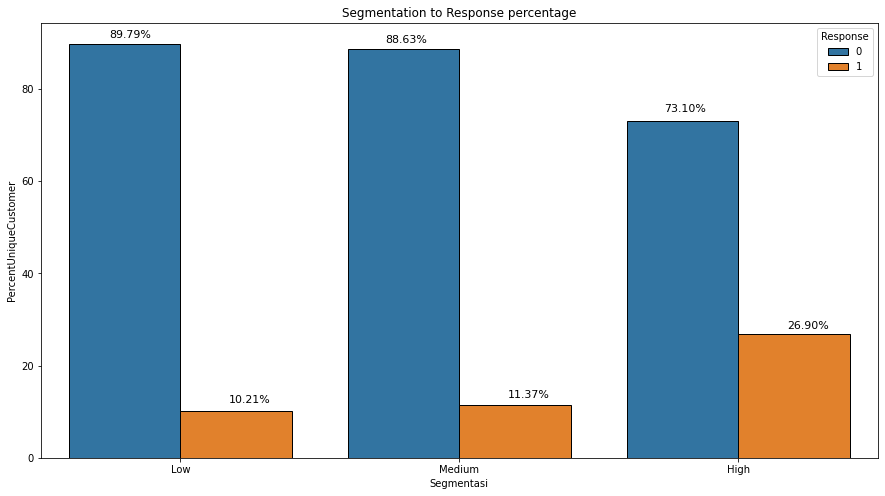

In [32]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x = 'Segmentasi', y = 'PercentUniqueCustomer', data = seg,
            hue = 'Response',edgecolor = 'black')

plt.text(x = -0.18, y = 91, s = "89.79%", ha='center', fontsize=11)
plt.text(x = 0.25, y = 12, s = "10.21%", ha='center', fontsize=11)

plt.text(x = 0.81, y = 90, s = "88.63%", ha='center', fontsize=11)
plt.text(x = 1.25, y = 13, s = "11.37%", ha='center', fontsize=11)

plt.text(x = 1.81, y = 75, s = "73.10%", ha='center', fontsize=11)
plt.text(x = 2.25, y = 28, s = "26.90%", ha='center', fontsize=11)

plt.title('Segmentation to Response percentage')

## Preprocessing

### Handling Missing Values

In [50]:
path = '/content/drive/MyDrive/Copy of marketing_campaign.xlsx'

df = pd.read_excel(path)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [51]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [52]:
missing_percentage(df)
#Karena di bawah 5% kita drop

,Total,Percent
Income,24,1.07


In [53]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

###Handle duplicated data

In [54]:
df.duplicated().any()

False

## Feature Extraction

In [55]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [56]:
df['month_Customer'] = (2014 - df.Dt_Customer.dt.year)*12 + df.Dt_Customer.dt.month
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,month_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,33
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,1


In [57]:
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,month_Customer,Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,33,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,3,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,1,422


In [58]:
df['Total_Cmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,month_Customer,Spending,Total_Cmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,33,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,3,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,20,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,1,422,0


1. Bisa menambahkan kolom umur dari kolom `Year_Birth`
2. Membuat kolom total spending dari setiap kolom pembelian produk `Mnt`
3. Membuat kolom `Year_Customer` dari kolom `Dt_customer`, untuk melihat berapa lama sudah menjadi member di toko Bulletproof Scouts
4. Bisa membuat kolom khusus cutomer yang memiliki anak, dari kolom `Kidhome` dan `Teenhome`(>0)


### Feature Encoding

In [59]:
df['Has_child'] = np.where(df.Kidhome+df.Teenhome > 0, 'Yes', 'No')

In [60]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,month_Customer,Spending,Total_Cmp,Has_child
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,33,1617,0,No
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,3,27,0,Yes
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,20,776,0,No
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,2,53,0,Yes
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,1,422,0,Yes


In [61]:
df['Marital_Status']=df['Marital_Status'].replace({'Married':'Couple','Together':'Couple','Absurd':'Single',
                                                      'Widow':'Divorced','YOLO':'Single', 'Alone':'Single'})

In [62]:
cats_updated = ['Education', 'Marital_Status']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Couple      1430
Single       478
Divorced     308
Name: Marital_Status, dtype: int64
------------------------------ 



In [63]:
for cat in ['Marital_Status']:
    onehots = pd.get_dummies(df[cat], prefix='MS')
    df = df.join(onehots)

In [64]:
mapping_child = {
    'No' : 0,
    'Yes' : 1
}
mapping_pendidikan = {
    'Basic' : 0,
    '2n Cycle' : 1,
    'Graduation' : 2,
    'Master' : 3,
    'PhD' : 4,
}

df['Education'] = df['Education'].map(mapping_pendidikan)
df['Has_child'] = df['Has_child'].map(mapping_child)

In [65]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,month_Customer,Spending,Total_Cmp,Has_child,MS_Couple,MS_Divorced,MS_Single
0,5524,1957,2,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,33,1617,0,0,0,0,1
1,2174,1954,2,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,3,27,0,1,0,0,1
2,4141,1965,2,Couple,71613.0,0,0,2013-08-21,26,426,...,3,11,0,20,776,0,0,1,0,0
3,6182,1984,2,Couple,26646.0,1,0,2014-02-10,26,11,...,3,11,0,2,53,0,1,1,0,0
4,5324,1981,4,Couple,58293.0,1,0,2014-01-19,94,173,...,3,11,0,1,422,0,1,1,0,0


In [66]:
Q1 = df.Income.quantile(.25)
Q3 = df.Income.quantile(.75)

In [67]:
def segment(x):
    try:
        x.Income.isnumeric()
    except:
        segment = 'No Sales'
    if x.Income >= Q3:
        segment = 'High'
    elif x.Income < Q3 and x.Income >= Q1:
        segment = 'Medium'
    else:
        segment = 'Low'
    return segment

In [68]:
df['Segmentasi'] = df.apply(lambda x: segment(x), axis = 1)
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,month_Customer,Spending,Total_Cmp,Has_child,MS_Couple,MS_Divorced,MS_Single,Segmentasi
2235,10870,1967,2,Couple,61223.0,0,1,2013-06-13,46,709,...,11,0,18,1341,0,1,1,0,0,Medium
2236,4001,1946,4,Couple,64014.0,2,1,2014-06-10,56,406,...,11,0,6,444,1,1,1,0,0,Medium
2237,7270,1981,2,Divorced,56981.0,0,0,2014-01-25,91,908,...,11,0,1,1241,1,0,0,1,0,Medium
2238,8235,1956,3,Couple,69245.0,0,1,2014-01-24,8,428,...,11,0,1,843,0,1,1,0,0,High
2239,9405,1954,4,Couple,52869.0,1,1,2012-10-15,40,84,...,11,1,34,172,0,1,1,0,0,Medium


In [69]:
segment = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

df['Segmentasi'] = df['Segmentasi'].map(segment)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int64         
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

## Modelling

### Handling Class Imbalance

In [71]:
X = df.drop(columns=['Response','Z_CostContact','Z_Revenue',
                     'ID','Year_Birth','Dt_Customer','Marital_Status', 'Teenhome','Kidhome' ])
y = df['Response'] # target / label

In [72]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 666)

In [73]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5, random_state = 666).fit_resample(X_train, y_train)
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    1314
1     657
Name: Response, dtype: int64


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


### Adaboost

In [74]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=666)
ab.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = ab.predict(X_test)
eval_classification(ab, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.60
Recall (Test Set): 0.70
F1-Score (Test Set): 0.64
AUC: 0.93


In [75]:
print('Train score: ' + str(ab.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(ab.score(X_test, y_test))) #accuracy

Train score: 0.8792491121258245
Test score:0.8887218045112782


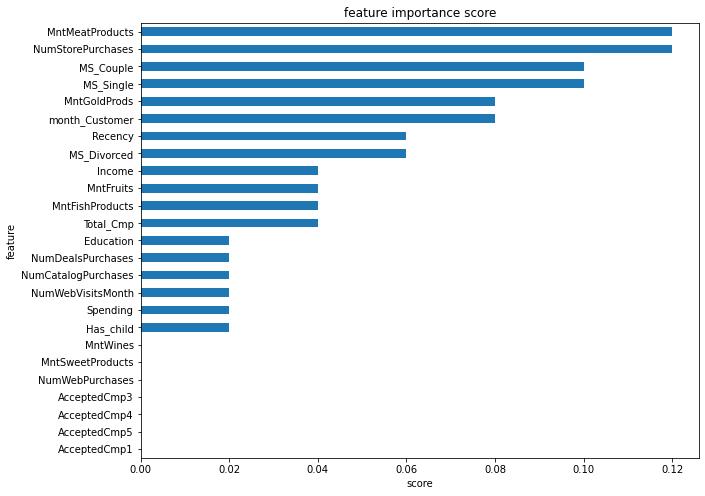

In [76]:
show_feature_importance(ab)

### Tuning Hyperparameter

In [77]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=666)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=666, cv=5, scoring='roc_auc')
ab_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.66
Recall (Test Set): 0.64
F1-Score (Test Set): 0.65
AUC: 0.94


In [78]:
print('Train score: ' + str(ab_tuned.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(ab_tuned.score(X_test, y_test))) #accuracy

Train score: 0.9582583302637095
Test score:0.936511423550088


In [79]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1500
Best learning_rate: 0.05831578947368421
Best algorithm: SAMME.R


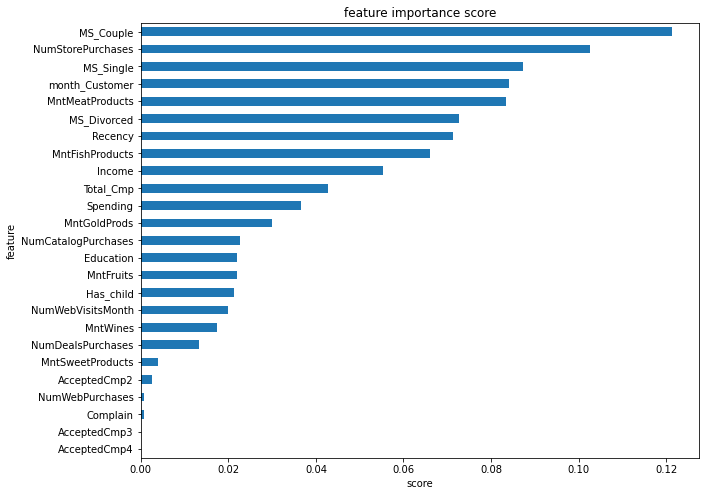

In [80]:
show_feature_importance(ab_tuned.best_estimator_)